# ZILLOW

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from env import host, user, password

In [2]:
def get_connection(db, user=user, host=host, password=password):
    '''
    get_connection uses login info from env.py file to access Codeup db.
    It takes in a string name of a database as an argument.
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'
    

In [5]:
def get_zillow_data():
    '''
    zillow_data() gets the zillow (only properties_2017 table) data from Codeup db, then writes it to a csv file,
    and returns the DF.
    '''
    # Creating a SQL query
    sql_query = '''
                SELECT DISTINCT * FROM properties_2017
    LEFT JOIN propertylandusetype USING (propertylandusetypeid)
    LEFT JOIN predictions_2017 USING (parcelid)
    LEFT JOIN airconditioningtype USING (airconditioningtypeid)
    LEFT JOIN architecturalstyletype USING (architecturalstyletypeid)
    LEFT JOIN buildingclasstype USING (buildingclasstypeid)
    LEFT JOIN heatingorsystemtype USING (heatingorsystemtypeid)
    LEFT JOIN storytype USING (storytypeid)
    LEFT JOIN typeconstructiontype USING (typeconstructiontypeid)
    LEFT JOIN unique_properties USING (parcelid)
    WHERE propertylandusedesc = 'Condominium' OR 'Single Family Residential' OR 'Townhouse' OR 'Cluster Home' OR 'Bungalow'
    OR 'Patio Home' AND longitude = 'non-null' AND latitude = 'non-null'
    AND transactiondate BETWEEN '2017-01-01' AND '2017-12-31';
                '''
    
    # Reading in the DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_connection('zillow'))
    return df

In [6]:
houses = get_zillow_data()
houses.head()

,parcelid,typeconstructiontypeid,storytypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,propertylandusetypeid,id,basementsqft,...,propertylandusedesc,id,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,storydesc,typeconstructiondesc
0,10859051,NaN,NaN,2.0,None,NaN,1.0,266.0,1853,NaN,...,Condominium,212.0,0.026735,2017-01-03,Central,None,None,Central,None,None
1,12859120,NaN,NaN,2.0,None,NaN,1.0,266.0,9323,NaN,...,Condominium,369.0,-0.017184,2017-01-03,Central,None,None,Central,None,None
2,14632619,NaN,NaN,NaN,None,NaN,NaN,266.0,13031,NaN,...,Condominium,3245.0,-0.064174,2017-01-17,None,None,None,None,None,None
3,11052658,NaN,NaN,2.0,None,NaN,1.0,266.0,17568,NaN,...,Condominium,400.0,-0.005658,2017-01-03,Central,None,None,Central,None,None
4,11270466,NaN,NaN,2.0,None,NaN,1.0,266.0,18257,NaN,...,Condominium,596.0,1.174471,2017-01-04,Central,None,None,Central,None,None


In [7]:
houses.shape

(483837, 69)

In [8]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483837 entries, 0 to 483836
Data columns (total 69 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   parcelid                      483837 non-null  int64  
 1   typeconstructiontypeid        4089 non-null    float64
 2   storytypeid                   16 non-null      float64
 3   heatingorsystemtypeid         321319 non-null  float64
 4   buildingclasstypeid           0 non-null       object 
 5   architecturalstyletypeid      3669 non-null    float64
 6   airconditioningtypeid         233279 non-null  float64
 7   propertylandusetypeid         483837 non-null  float64
 8   id                            483837 non-null  int64  
 9   basementsqft                  16 non-null      float64
 10  bathroomcnt                   483837 non-null  float64
 11  bedroomcnt                    483837 non-null  float64
 12  buildingqualitytypeid         286661 non-nul

In [102]:
houses[['latitude', 'longitude']].isnull().value_counts(normalize=True)

latitude  longitude
False     False        1.0
dtype: float64

In [11]:
houses.describe().T.astype('int64')

,count,mean,std,min,25%,50%,75%,max
parcelid,483837,14225634,13395488,10714522,11582473,12570713,14666180,168183267
typeconstructiontypeid,4089,6,0,4,6,6,6,13
storytypeid,16,7,0,7,7,7,7,7
heatingorsystemtypeid,321319,3,5,1,2,2,2,24
architecturalstyletypeid,3669,7,2,2,7,7,7,27
airconditioningtypeid,233279,1,0,1,1,1,1,13
propertylandusetypeid,483837,266,0,266,266,266,266,266
id,483837,1492971,860784,14,746131,1492125,2237380,2982283
basementsqft,16,443,169,104,330,539,539,618
bathroomcnt,483837,2,0,0,2,2,3,18


In [12]:
houses.columns.duplicated().any()

True

In [14]:
houses = houses.loc[:,~houses.T.duplicated(keep='first')]

In [15]:
houses.head()

,parcelid,typeconstructiontypeid,storytypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,propertylandusetypeid,id,basementsqft,...,censustractandblock,propertylandusedesc,id,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,heatingorsystemdesc,storydesc,typeconstructiondesc
0,10859051,NaN,NaN,2.0,None,NaN,1.0,266.0,1853,NaN,...,6.037141e+13,Condominium,212.0,0.026735,2017-01-03,Central,None,Central,None,None
1,12859120,NaN,NaN,2.0,None,NaN,1.0,266.0,9323,NaN,...,6.037403e+13,Condominium,369.0,-0.017184,2017-01-03,Central,None,Central,None,None
2,14632619,NaN,NaN,NaN,None,NaN,NaN,266.0,13031,NaN,...,6.059032e+13,Condominium,3245.0,-0.064174,2017-01-17,None,None,None,None,None
3,11052658,NaN,NaN,2.0,None,NaN,1.0,266.0,17568,NaN,...,6.037117e+13,Condominium,400.0,-0.005658,2017-01-03,Central,None,Central,None,None
4,11270466,NaN,NaN,2.0,None,NaN,1.0,266.0,18257,NaN,...,6.037901e+13,Condominium,596.0,1.174471,2017-01-04,Central,None,Central,None,None


In [16]:
houses.columns.duplicated().any()

True

In [18]:
cols=pd.Series(houses.columns)
for dup in houses.columns[houses.columns.duplicated(keep=False)]: 
    cols[houses.columns.get_loc(dup)] = ([dup + '_' + str(d_idx) 
                                     if d_idx != 0 
                                     else dup 
                                     for d_idx in range(houses.columns.get_loc(dup).sum())]
                                    )
houses.columns=cols

In [19]:
houses.columns.tolist()

['parcelid',
 'typeconstructiontypeid',
 'storytypeid',
 'heatingorsystemtypeid',
 'buildingclasstypeid',
 'architecturalstyletypeid',
 'airconditioningtypeid',
 'propertylandusetypeid',
 'id',
 'basementsqft',
 'bathroomcnt',
 'bedroomcnt',
 'buildingqualitytypeid',
 'calculatedbathnbr',
 'decktypeid',
 'finishedfloor1squarefeet',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedsquarefeet6',
 'fips',
 'fireplacecnt',
 'fullbathcnt',
 'garagecarcnt',
 'garagetotalsqft',
 'hashottuborspa',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'poolcnt',
 'poolsizesum',
 'pooltypeid10',
 'pooltypeid2',
 'pooltypeid7',
 'propertycountylandusecode',
 'propertyzoningdesc',
 'rawcensustractandblock',
 'regionidcity',
 'regionidcounty',
 'regionidneighborhood',
 'regionidzip',
 'roomcnt',
 'threequarterbathnbr',
 'unitcnt',
 'yardbuildingsqft17',
 'yardbuildingsqft26',
 'yearbuilt',
 'numberofstories',
 'fireplaceflag',
 'struc

In [21]:
houses.columns.value_counts()

parcelid                      1
structuretaxvaluedollarcnt    1
propertyzoningdesc            1
rawcensustractandblock        1
regionidcity                  1
                             ..
longitude                     1
lotsizesquarefeet             1
poolcnt                       1
poolsizesum                   1
typeconstructiondesc          1
Length: 67, dtype: int64

In [24]:
for column in houses.columns:
    print(column)
    print(houses[column].value_counts())
    print('\n##########################\n')

parcelid
12068159    2
12641353    2
14634203    2
12541155    2
10777937    2
           ..
14743165    1
14742843    1
14742420    1
14737462    1
14675114    1
Name: parcelid, Length: 483789, dtype: int64

##########################

typeconstructiontypeid
6.0     4054
4.0       21
13.0      11
10.0       3
Name: typeconstructiontypeid, dtype: int64

##########################

storytypeid
7.0    16
Name: storytypeid, dtype: int64

##########################

heatingorsystemtypeid
2.0     271629
24.0     21086
7.0      19949
6.0       6677
13.0       903
18.0       449
20.0       444
1.0        120
12.0        25
10.0        21
11.0        12
21.0         3
19.0         1
Name: heatingorsystemtypeid, dtype: int64

##########################

buildingclasstypeid
Series([], Name: buildingclasstypeid, dtype: int64)

##########################

architecturalstyletypeid
7.0     3128
8.0      335
2.0      106
21.0      74
3.0       16
5.0        9
27.0       1
Name: architecturalstyletype

1.0    80901
2.0      140
Name: threequarterbathnbr, dtype: int64

##########################

unitcnt
1.0      293411
2.0          88
3.0          14
4.0          13
6.0           7
7.0           4
13.0          3
12.0          3
5.0           3
10.0          2
9.0           2
32.0          1
8.0           1
11.0          1
14.0          1
232.0         1
27.0          1
18.0          1
63.0          1
70.0          1
Name: unitcnt, dtype: int64

##########################

yardbuildingsqft17
80.0     305
98.0     206
72.0     189
84.0     185
120.0    164
        ... 
349.0      1
111.0      1
324.0      1
181.0      1
525.0      1
Name: yardbuildingsqft17, Length: 334, dtype: int64

##########################

yardbuildingsqft26
25.0     23
33.0     18
30.0     11
32.0      2
171.0     1
100.0     1
344.0     1
361.0     1
116.0     1
170.0     1
88.0      1
49.0      1
739.0     1
35.0      1
50.0      1
Name: yardbuildingsqft26, dtype: int64

##########################

yearbuilt


<AxesSubplot:xlabel='index'>

<Figure size 1440x1008 with 0 Axes>

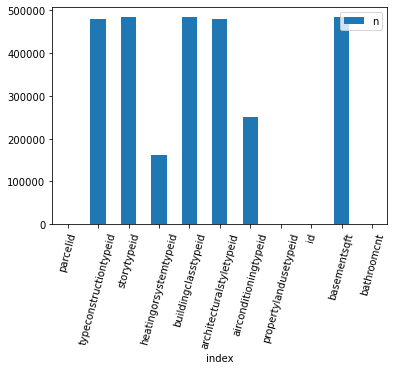

In [82]:
houses[['parcelid',
 'typeconstructiontypeid',
 'storytypeid',
 'heatingorsystemtypeid',
 'buildingclasstypeid',
 'architecturalstyletypeid',
 'airconditioningtypeid',
 'propertylandusetypeid',
 'id',
 'basementsqft',
 'bathroomcnt']].isna().sum().reset_index(name="n").plot.bar(x='index', y='n', rot=75)

<AxesSubplot:xlabel='index'>

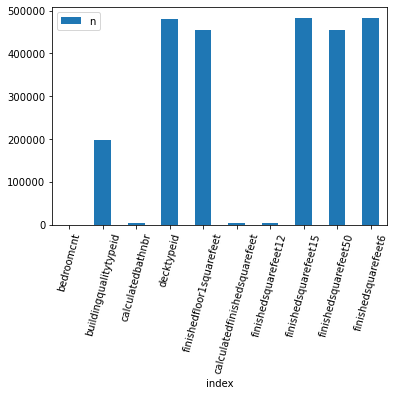

In [94]:
houses[['bedroomcnt',
 'buildingqualitytypeid',
 'calculatedbathnbr',
 'decktypeid',
 'finishedfloor1squarefeet',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedsquarefeet6']].isna().sum().reset_index(name="n").plot.bar(x='index', y='n', rot=75)

<AxesSubplot:xlabel='index'>

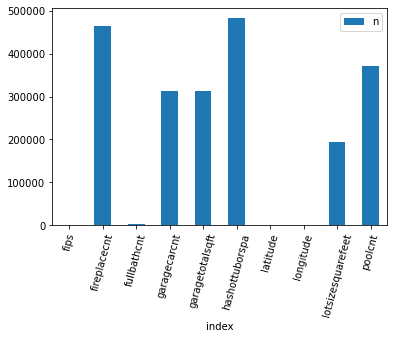

In [95]:
houses[['fips',
 'fireplacecnt',
 'fullbathcnt',
 'garagecarcnt',
 'garagetotalsqft',
 'hashottuborspa',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'poolcnt']].isna().sum().reset_index(name="n").plot.bar(x='index', y='n', rot=75)

In [86]:
def multi_frequency(ds,vars):
    '''multi_frequency takes a dataframe in *arg and a *kwarg in the form of a list of columns
    and return a dataframe with the count and the frequency of the data
    '''
    frequency=ds[vars].isnull().sum()
    percentage=ds[vars].isnull().sum()*100/(len(ds))
    df=pd.concat([frequency,percentage], axis=1, keys=['num_rows_missing', 'pct_rows_missing'])
    return df
multi_frequency(houses, ['parcelid',
 'typeconstructiontypeid', 'storytypeid',
 'heatingorsystemtypeid',
 'buildingclasstypeid',
 'architecturalstyletypeid',
 'airconditioningtypeid',
 'propertylandusetypeid',
 'id',
 'basementsqft',
 'bathroomcnt',
 'bedroomcnt'])

,num_rows_missing,pct_rows_missing
parcelid,0,0.000000
typeconstructiontypeid,479748,99.154881
storytypeid,483821,99.996693
heatingorsystemtypeid,162518,33.589411
buildingclasstypeid,483837,100.000000
architecturalstyletypeid,480168,99.241687
airconditioningtypeid,250558,51.785622
propertylandusetypeid,0,0.000000
id,0,0.000000
basementsqft,483821,99.996693


In [87]:
 multi_frequency(houses, ['buildingqualitytypeid',
 'calculatedbathnbr',
 'decktypeid',
 'finishedfloor1squarefeet',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedsquarefeet6',
 'fips'])

,num_rows_missing,pct_rows_missing
buildingqualitytypeid,197176,40.752567
calculatedbathnbr,3745,0.774021
decktypeid,479854,99.176789
finishedfloor1squarefeet,453780,93.787784
calculatedfinishedsquarefeet,3302,0.682461
finishedsquarefeet12,3566,0.737025
finishedsquarefeet15,483629,99.957010
finishedsquarefeet50,453780,93.787784
finishedsquarefeet6,483781,99.988426
fips,0,0.000000


In [88]:
multi_frequency(houses, ['fireplacecnt',
 'fullbathcnt',
 'garagecarcnt',
 'garagetotalsqft',
 'hashottuborspa',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'poolcnt',
 'poolsizesum'])

,num_rows_missing,pct_rows_missing
fireplacecnt,464836,96.072851
fullbathcnt,3745,0.774021
garagecarcnt,313202,64.732958
garagetotalsqft,313202,64.732958
hashottuborspa,483134,99.854703
latitude,0,0.000000
longitude,0,0.000000
lotsizesquarefeet,193123,39.914889
poolcnt,371727,76.828973
poolsizesum,483764,99.984912


In [89]:
multi_frequency(houses, ['pooltypeid10',
 'pooltypeid2',
 'pooltypeid7',
 'propertycountylandusecode',
 'propertyzoningdesc',
 'rawcensustractandblock',
 'regionidcity',
 'regionidcounty',
 'regionidneighborhood',
 'regionidzip'])

,num_rows_missing,pct_rows_missing
pooltypeid10,483280,99.884879
pooltypeid2,483691,99.969825
pooltypeid7,371991,76.883537
propertycountylandusecode,25,0.005167
propertyzoningdesc,188378,38.934187
rawcensustractandblock,0,0.000000
regionidcity,9968,2.060198
regionidcounty,0,0.000000
regionidneighborhood,257356,53.190641
regionidzip,4206,0.869301


In [91]:
multi_frequency(houses, ['roomcnt',
 'threequarterbathnbr',
 'unitcnt',
 'yardbuildingsqft17',
 'yardbuildingsqft26',
 'yearbuilt',
 'numberofstories',
 'fireplaceflag',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt'])

,num_rows_missing,pct_rows_missing
roomcnt,0,0.000000
threequarterbathnbr,402796,83.250351
unitcnt,190278,39.326881
yardbuildingsqft17,477425,98.674760
yardbuildingsqft26,483772,99.986566
yearbuilt,3428,0.708503
numberofstories,424606,87.758067
fireplaceflag,481523,99.521740
structuretaxvaluedollarcnt,1500,0.310022
taxvaluedollarcnt,204,0.042163


In [92]:
multi_frequency(houses, ['assessmentyear',
 'landtaxvaluedollarcnt',
 'taxamount',
 'taxdelinquencyflag',
 'taxdelinquencyyear',
 'censustractandblock',
 'propertylandusedesc',
 'id_1',
 'logerror',
 'transactiondate'])

,num_rows_missing,pct_rows_missing
assessmentyear,0,0.000000
landtaxvaluedollarcnt,205,0.042370
taxamount,1055,0.218049
taxdelinquencyflag,476187,98.418889
taxdelinquencyyear,476186,98.418682
censustractandblock,11542,2.385514
propertylandusedesc,0,0.000000
id_1,464495,96.002373
logerror,464495,96.002373
transactiondate,464495,96.002373


In [93]:
multi_frequency(houses, ['airconditioningdesc',
 'architecturalstyledesc',
 'heatingorsystemdesc',
 'storydesc',
 'typeconstructiondesc'])

,num_rows_missing,pct_rows_missing
airconditioningdesc,250558,51.785622
architecturalstyledesc,480168,99.241687
heatingorsystemdesc,162518,33.589411
storydesc,483821,99.996693
typeconstructiondesc,479748,99.154881


In [97]:
a = (41/67)*100
a

61.19402985074627

## Takeaways
- 61.2% of the data is missing between 30% and 100% of its values
- This makes me think that the best cut off would be the 30% threshold
- Many columns are id columns and should be removed

In [ ]:
houses = houses.drop(['typeconstructiontypeid',
 'storytypeid',
 'heatingorsystemtypeid',
 'buildingclasstypeid',
 'architecturalstyletypeid',
 'airconditioningtypeid',
 'propertylandusetypeid',
 'id',
 'buildingqualitytypeid',
 'id_1'] axis = 1)
houses

In [ ]:
def examine_and_prepare()

In [ ]:
def _maybe_dedup_names(self, names):
    # see gh-7160 and gh-9424: this helps to provide
    # immediate alleviation of the duplicate names
    # issue and appears to be satisfactory to users,
    # but ultimately, not needing to butcher the names
    # would be nice!
    if self.mangle_dupe_cols:
        names = list(names)  # so we can index
        counts = {}

        for i, col in enumerate(names):
            cur_count = counts.get(col, 0)

            if cur_count > 0:
                names[i] = '%s.%d' % (col, cur_count)

            counts[col] = cur_count + 1

    return names

In [ ]:
display(data.loc[2 : 5])


In [ ]:
figure, ax1 = plt.subplots()
ax1.plot(df.iloc[:,0],df.iloc[:,1],linewidth=0.5,zorder=1, label = "Force1")
ax1.plot(df.iloc[:,0],df.iloc[:,2],linewidth=0.5,zorder=1, label = "Force2")